In [73]:
include("aklt.jl")
push!(LOAD_PATH, "../functions/")
using BP
using Plots
# https://journals.aps.org/prb/pdf/10.1103/PhysRevB.102.165108
# https://journals.aps.org/prb/pdf/10.1103/PhysRevB.98.014432

In [74]:
L = 10
N = L^2
w = 4
cluster_data = load_latest_cluster_file(L, w)
all_loops = cluster_data.all_loops;  
all_loops_ = [loop_object.edges for loop_object in all_loops]; # this contains list of loops as list of edges 
clusters_by_site = cluster_data.clusters_by_site;

📖 Loading cluster data from: periodic_clusters_L10_w4.jld2


In [ ]:
a1 = sqrt(3/2)


TN = aklt_norm_network(L; a1 = a1, a2 = a2)
adj_mat, edges, links = BP.get_adj_mat(TN)
messages = BP.get_messages(TN, edges, links; random_part=0.1)
messages = BP.message_passing(TN, messages, edges, adj_mat; α=0.75, max_iters=5000)
Z_list = BP.get_fixed_point_list(TN, messages, adj_mat)
TN = BP.normalize_tensors(TN, Z_list)
TN_normalized = BP.normalize_tensors(TN, Z_list)
Z_list_complex = Complex.(Z_list)
bp_FE_per_site = sum(log.(Z_list_complex)) / N
bp_PF_per_site = exp(bp_FE_per_site)
loopsum = abs(sum([scalar(BP.loop_contribution(loop, messages, TN_normalized, edges, links, adj_mat)) for loop in all_loops_]))
exact_FE_per_site = ctmrg_exact_FE_density(a1,a2)
BP_error = abs(bp_FE_per_site - exact_FE_per_site)

szt = aklt_sz_tensor(inds(TN[1]); a1 = a1, a2 = a2)
nmlz = TN[1]
for nbr in BP.get_nbrs(adj_mat,1)
    szt *= messages[nbr,1]
    nmlz *= messages[nbr,1]
end 
scalar(szt/ nmlz)

2.986093365384094e-15 + 0.0im

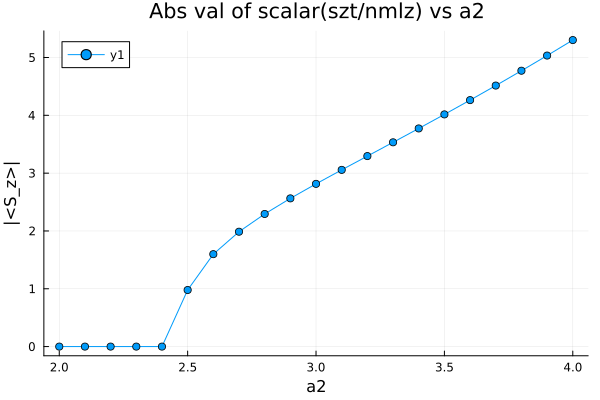

In [ ]:
# Plot abs(scalar(szt/nmlz)) as a function of a2 in a2_arr
a2_arr = 0.1:0.1:4.
a1_arr = 0.1:0.1:4.
abs_vals = Float64[]
for a2 in a2_arr
    TN_tmp = aklt_norm_network(L; a1=a1, a2=a2)
    adj_mat_tmp, edges_tmp, links_tmp = BP.get_adj_mat(TN_tmp)
    messages_tmp = BP.get_messages(TN_tmp, edges_tmp, links_tmp; random_part=0.1)
    messages_tmp = BP.message_passing(TN_tmp, messages_tmp, edges_tmp, adj_mat_tmp; α=0.75, max_iters=5000)
    Z_list_tmp = BP.get_fixed_point_list(TN_tmp, messages_tmp, adj_mat_tmp)
    TN_tmp = BP.normalize_tensors(TN_tmp, Z_list_tmp)
    szt = aklt_sz_tensor(inds(TN_tmp[1]); a1=a1, a2=a2)
    nmlz = TN_tmp[1]
    for nbr in BP.get_nbrs(adj_mat_tmp, 1)
        szt *= messages_tmp[nbr, 1]
        nmlz *= messages_tmp[nbr, 1]
    end
    push!(abs_vals, abs(scalar(szt/nmlz)))
end
plot(a2_arr, abs_vals, xlabel="a2", ylabel="|<S_z>|", marker=:circle, title="Abs val of scalar(szt/nmlz) vs a2")

0.1 0.1
0.1 0.2
0.1 0.3
0.1 0.4
0.1 0.5
0.1 0.6
0.1 0.7
0.1 0.8
0.1 0.9
0.1 1.0
0.1 1.1
0.1 1.2
0.1 1.3
0.1 1.4
0.1 1.5
0.1 1.6
0.1 1.7
0.1 1.8
0.1 1.9
0.1 2.0
0.1 2.1
0.1 2.2
0.1 2.3
0.1 2.4
0.1 2.5
0.1 2.6
0.1 2.7
0.1 2.8
0.1 2.9
0.1 3.0
0.1 3.1
0.1 3.2
0.1 3.3
0.1 3.4
0.1 3.5
0.1 3.6
0.1 3.7
0.1 3.8
0.1 3.9
0.1 4.0
0.2 0.1
0.2 0.2
0.2 0.3
0.2 0.4
0.2 0.5
0.2 0.6
0.2 0.7
0.2 0.8
0.2 0.9
0.2 1.0
0.2 1.1
0.2 1.2
0.2 1.3
0.2 1.4
0.2 1.5
0.2 1.6
0.2 1.7
0.2 1.8
0.2 1.9
0.2 2.0
0.2 2.1
0.2 2.2
0.2 2.3
0.2 2.4
0.2 2.5
0.2 2.6
0.2 2.7
0.2 2.8
0.2 2.9
0.2 3.0
0.2 3.1
0.2 3.2
0.2 3.3
0.2 3.4
0.2 3.5
0.2 3.6
0.2 3.7
0.2 3.8
0.2 3.9
0.2 4.0
0.3 0.1
0.3 0.2
0.3 0.3
0.3 0.4
0.3 0.5
0.3 0.6
0.3 0.7
0.3 0.8
0.3 0.9
0.3 1.0
0.3 1.1
0.3 1.2
0.3 1.3
0.3 1.4
0.3 1.5
0.3 1.6
0.3 1.7
0.3 1.8
0.3 1.9
0.3 2.0
0.3 2.1
0.3 2.2
0.3 2.3
0.3 2.4
0.3 2.5
0.3 2.6
0.3 2.7
0.3 2.8
0.3 2.9
0.3 3.0
0.3 3.1
0.3 3.2
0.3 3.3
0.3 3.4
0.3 3.5
0.3 3.6
0.3 3.7
0.3 3.8
0.3 3.9
0.3 4.0
0.4 0.1
0.4 0.2
0.4 0.3
0.4 0.4
0.4 0.5


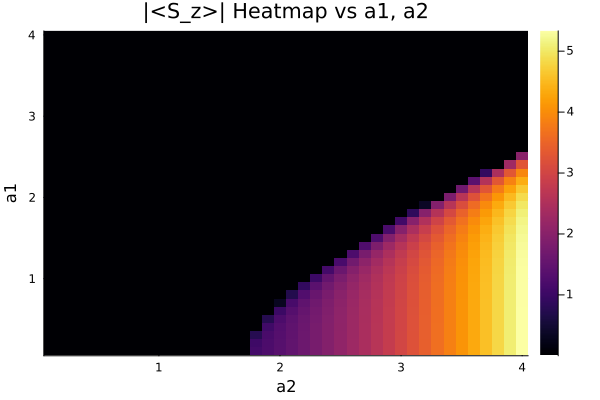

In [88]:
# Heatmap of abs(scalar(szt/nmlz)) with both a1 and a2 varying
a1_arr = 0.1:0.1:4.0
a2_arr = 0.1:0.1:4.0
heatmap_vals = zeros(length(a1_arr), length(a2_arr))
for (i, a1) in enumerate(a1_arr)
    for (j, a2) in enumerate(a2_arr)
        println(a1, " ", a2)
        TN_tmp = aklt_norm_network(L; a1=a1, a2=a2)
        adj_mat_tmp, edges_tmp, links_tmp = BP.get_adj_mat(TN_tmp)
        messages_tmp = BP.get_messages(TN_tmp, edges_tmp, links_tmp; random_part=0.1)
        messages_tmp = BP.message_passing(TN_tmp, messages_tmp, edges_tmp, adj_mat_tmp; α=0.75, max_iters=5000)
        Z_list_tmp = BP.get_fixed_point_list(TN_tmp, messages_tmp, adj_mat_tmp)
        TN_tmp = BP.normalize_tensors(TN_tmp, Z_list_tmp)
        szt = aklt_sz_tensor(inds(TN_tmp[1]); a1=a1, a2=a2)
        nmlz = TN_tmp[1]
        for nbr in BP.get_nbrs(adj_mat_tmp, 1)
            szt *= messages_tmp[nbr, 1]
            nmlz *= messages_tmp[nbr, 1]
        end
        heatmap_vals[i, j] = abs(scalar(szt/nmlz))
    end
end
heatmap(a2_arr, a1_arr, heatmap_vals, xlabel="a2", ylabel="a1", title="|<S_z>| Heatmap vs a1, a2")

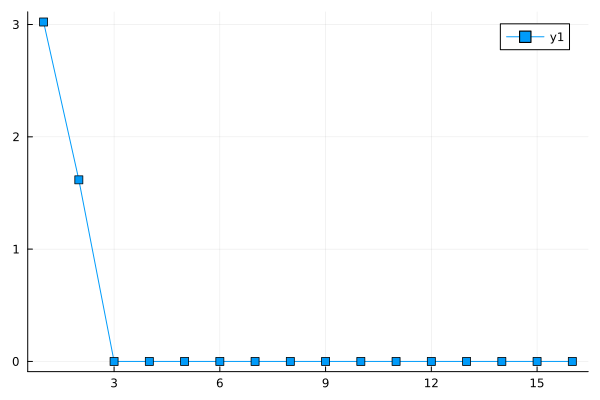

In [35]:
t1 = TN_normalized[1]
u, s , v = svd(t1, inds(t1)[1:2])
svals = [s[i,i] for i in 1:(dim(inds(s)[1]))]
plot(svals,marker=:square)

In [159]:
clustercorrx = 0.0 + 0.0im  # Start with complex number

# Deduplicate clusters manually (we know Set doesn't work)
clusters_by_signature = Dict{Tuple, Vector{Tuple{Int, Cluster}}}()

for site in 1:N
    clusters = clusters_by_site[site]
    for cluster in clusters
        signature = (cluster.weight, cluster.total_loops, sort(cluster.loop_ids), sort(collect(cluster.multiplicities)))
        if !haskey(clusters_by_signature, signature)
            clusters_by_signature[signature] = []
        end
        push!(clusters_by_signature[signature], (site, cluster))
    end
end

# Compute contributions for unique clusters
for (sig, cluster_list) in clusters_by_signature
    cluster = cluster_list[1][2]  # Take first representative
    contribution = cluster_contr(TN_normalized, messages, edges, links, adj_mat, cluster, all_loops)
    if !isnan(contribution) && isfinite(contribution)
        clustercorrx += Complex(contribution)  # Ensure complex arithmetic
    end
end

cluster_FE_per_site_correction = clustercorrx / N 

0.006051761597063496 + 0.0im

In [160]:
corrected_FE_per_site = bp_FE_per_site + cluster_FE_per_site_correction
corrected_PF_per_site = exp(corrected_FE_per_site)
# Calculate free energy per site errors
bp_error = abs(bp_FE_per_site - exact_FE_per_site)
cluster_error = abs(corrected_FE_per_site - exact_FE_per_site)

println("BP error...", bp_error)
println("Cluster error...", cluster_error)

BP error...0.016522277344789532
Cluster error...0.010470515747726034


ctmrg_exact_FE_density (generic function with 1 method)